In [1]:
import sklearn
import scipy
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_theme()

In [39]:
df = pd.read_csv("train.csv")

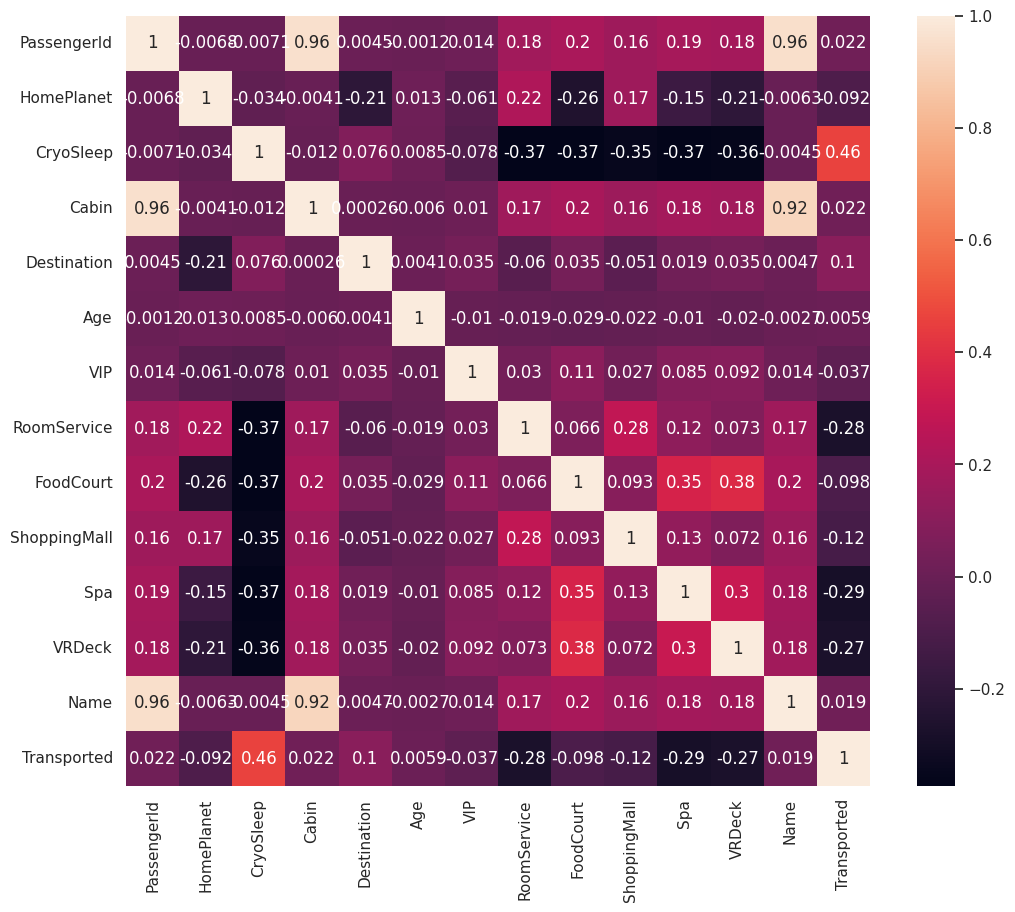

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Adjust the size as needed

ax = sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson'), annot=True)

In [88]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

model = SVC()

df = df.fillna(0)

X = df[['CryoSleep', 'Age']]

y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


model.fit(X_train, y_train)

# new_model = SelectFromModel(model, prefit=True)

# X_new = new_model.transform(X)


# X.shape, X_new.shape

SVC()

In [89]:
from sklearn.metrics import precision_recall_fscore_support
y_test_pred = model.predict(X_test)

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred)

# Put it into a DataFrame for pretty printing
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

metrics_df.index = ['Not Transported', 'Transported']

print(metrics_df.round(3))

                 Precision  Recall  F1-Score  Support
Not Transported      0.690   0.818     0.749     1424
Transported          0.781   0.638     0.702     1445
